# Atividade 1

## Word2Vec

O objetivo deste laboratório é demonstrar como criar uma estrutura capaz de transformar a informação textual apresentada em aula.

Vamos demonstrar isso utilizando apenas o tensorflow.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Lista de Documentos

Aqui temos uma lista de strings com o conteúdo apresentado nos slides em aula. Acrescentei um número maior de frases para um resultado mais interessante.

In [2]:
documentos = [
    'o rei e um homem de bravura',
    'a rainha e uma mulher de sabedoria',
    'o menino e um homem jovem',
    'a menina e uma mulher jovem',
    'o principe e um jovem rei',
    'a princesa e uma jovem rainha',
    'principe e um menino que sera rei',
    'princesa e uma menina que sera rainha',
    'o homem e bruto',
    'a mulher e bonita'
]

documentos

['o rei e um homem de bravura',
 'a rainha e uma mulher de sabedoria',
 'o menino e um homem jovem',
 'a menina e uma mulher jovem',
 'o principe e um jovem rei',
 'a princesa e uma jovem rainha',
 'principe e um menino que sera rei',
 'princesa e uma menina que sera rainha',
 'o homem e bruto',
 'a mulher e bonita']

### Removendo StopWords

Neste problema, temos todas as frases padronizadas com suas letras minúsculas e sem acentos. Lembre que isso não é uma regra, mas modelamos o problema para respeitar essa padronização.

Agora vamos remover as stopwords do nosso conjunto de documentos. Essa lista de stopwords é resumida, para você ter uma ideia de uma lista mais rica em informação, consulte este [link](https://gist.github.com/alopes/5358189).

Outra biblioteca que traz, além de uma lista de stopwords, outros facilitadores para trabalho e análise de textos em python é a [NLTK (**N**atural **L**anguage **T**ool**K**it)](https://www.nltk.org/).

In [3]:
def remove_sw(documentos):
    stop_words = ['e', 'o', 'a', 'um', 'uma', 'sera', 'que', 'de']
    resultado = []
    for doc in documentos:
        tmp = doc.split(' ')
        for sw in stop_words:
            if sw in tmp:
                tmp.remove(sw)
        resultado.append(" ".join(tmp))
    
    return resultado

Ao aplicar essa função acima em nossa lista de documentos, o que esperamos como resposta é uma lista contendo os mesmos documentos de entrada, porém, sem as _**stopwords**_ registradas no bloco da função.

In [4]:
documentos = remove_sw(documentos)
documentos

['rei homem bravura',
 'rainha mulher sabedoria',
 'menino homem jovem',
 'menina mulher jovem',
 'principe jovem rei',
 'princesa jovem rainha',
 'principe menino rei',
 'princesa menina rainha',
 'homem bruto',
 'mulher bonita']

### Definindo um vocabulário

Depois dos filtros aplicados, podemos definir então qual é o vocabulário do nosso conjunto de documentos (corpus).

Um vocabulário é um conjunto contendo as palavras pertencentes aos nossos documentos.

In [5]:
vocabulario = []
for doc in documentos:
    for palavra in doc.split(' '):
        vocabulario.append(palavra)

vocabulario = set(vocabulario)
vocabulario

{'bonita',
 'bravura',
 'bruto',
 'homem',
 'jovem',
 'menina',
 'menino',
 'mulher',
 'princesa',
 'principe',
 'rainha',
 'rei',
 'sabedoria'}

### N-Grams com n=2

Vamos relacionar as palavras utilizando 2-grams, ou seja, vamos analisar o relacionamento dessas palavras com seus 2 vizinhos próximos.

Com essa abordagem, nosso objetivo já é padronizar a informação com o que temos de _**input**_ e _**target**_.

Para facilitar a criação de nossos vetores binários representativos, vamos enumerar as palavras do nosso vocabulário.

In [6]:
# Crio um vetor representativo para cada palavra do vocabulário utilizando Skip-gram com 2 n-grams

label_palavra = {}
N = 2

for i, p in enumerate(vocabulario):
    label_palavra[p] = i
    
label_palavra

{'bravura': 0,
 'jovem': 1,
 'principe': 2,
 'bruto': 3,
 'menina': 4,
 'mulher': 5,
 'sabedoria': 6,
 'rainha': 7,
 'princesa': 8,
 'homem': 9,
 'rei': 10,
 'bonita': 11,
 'menino': 12}

Vamos dividir nossos documentos em um vetor de palavras:

In [7]:
ss = []
for s in documentos:
    ss.append(s.split())
    
ss

[['rei', 'homem', 'bravura'],
 ['rainha', 'mulher', 'sabedoria'],
 ['menino', 'homem', 'jovem'],
 ['menina', 'mulher', 'jovem'],
 ['principe', 'jovem', 'rei'],
 ['princesa', 'jovem', 'rainha'],
 ['principe', 'menino', 'rei'],
 ['princesa', 'menina', 'rainha'],
 ['homem', 'bruto'],
 ['mulher', 'bonita']]

Organizamos nossa informação como uma matriz entre _**inputs**_ e _**targets**__:

In [8]:
_dt = []
for s in ss:
    for index, p in enumerate(s):
        for vizinho in s[max(index - N, 0) : min(index + N, len(s)) + 1]: 
            if vizinho != p:
                _dt.append([p, vizinho])
                
_dt[:10]

[['rei', 'homem'],
 ['rei', 'bravura'],
 ['homem', 'rei'],
 ['homem', 'bravura'],
 ['bravura', 'rei'],
 ['bravura', 'homem'],
 ['rainha', 'mulher'],
 ['rainha', 'sabedoria'],
 ['mulher', 'rainha'],
 ['mulher', 'sabedoria']]

Para facilitar o acesso aos dados, vamos gerar um _DataFrame_ com a matriz acima:

In [9]:
df = pd.DataFrame(_dt, columns = ['input', 'target'])
df.head()

,input,target
0,rei,homem
1,rei,bravura
2,homem,rei
3,homem,bravura
4,bravura,rei


### Encoding

Temos tudo o que precisamos para transformar o dado em um representativo vetorial. Criamos duas novas listas que receberão estes vetores.

In [10]:
inputs  = []
targets = []

one_hot_dim = len(vocabulario)

def one_hot_encoding(dp):
    one_hot_enc     = np.zeros(one_hot_dim)
    one_hot_enc[dp] = 1
    return one_hot_enc

for i, j in zip(df['input'], df['target']):
    inputs.append(one_hot_encoding(label_palavra[i]))
    targets.append(one_hot_encoding(label_palavra[j]))

print(f'Vetores resultado:\nInputs:\n{inputs[:5]}\nTargets:\n{targets[:5]}')
    
X_train = np.asarray(inputs)
Y_train = np.asarray(targets)

print(f'Vetores resultado:\nX_train:\n{X_train[:5]}\nY_train:\n{Y_train[:5]}')

Vetores resultado:
Inputs:
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
Targets:
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])]
Vetores resultado:
X_train:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Y_train:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 

### Rede

Vamos construir a rede exatamente como mostrado nos slides. Estamos interessados nos valores gerados na camada escondida.

In [11]:
x = tf.placeholder(tf.float32, shape=(None, one_hot_dim))
y = tf.placeholder(tf.float32, shape=(None, one_hot_dim))

embedding_nodes = 2 

W_1 = tf.Variable(tf.random_normal([one_hot_dim, embedding_nodes]))
b_1 = tf.Variable(tf.random_normal([1]))
densa = tf.add(tf.matmul(x, W_1), b_1)

W_2 = tf.Variable(tf.random_normal([embedding_nodes, one_hot_dim]))
b_2 = tf.Variable(tf.random_normal([1]))

pred = tf.nn.softmax(tf.add( tf.matmul(densa, W_2), b_2))
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), axis=[1]))

train_operator = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

epochs = 25000

for i in range(epochs):
    sess.run(train_operator, feed_dict={x: X_train, y: Y_train})
    if i % 5000 == 0:
        print(f'iteração {i} - loss {sess.run(loss, feed_dict={x: X_train, y: Y_train})}')

iteração 0 - loss 3.2166175842285156
iteração 5000 - loss 1.8450576066970825
iteração 10000 - loss 1.8095208406448364
iteração 15000 - loss 1.7932313680648804
iteração 20000 - loss 1.7828011512756348


In [13]:
vetores = sess.run(W_1 + b_1)
vetores

array([[ 4.203136  ,  3.0890317 ],
       [ 0.35712373,  0.38228047],
       [ 0.6021834 ,  0.10278136],
       [ 3.7984462 ,  4.081257  ],
       [-0.5643188 ,  2.5166526 ],
       [-3.5344992 ,  1.5488732 ],
       [-0.8197001 ,  5.747223  ],
       [-0.654214  ,  0.5991994 ],
       [-5.1433825 ,  3.4971647 ],
       [ 0.19467795, -0.2970153 ],
       [ 0.34036493,  0.14786208],
       [ 1.7038429 ,  5.99118   ],
       [ 0.8090789 ,  0.727739  ]], dtype=float32)

In [14]:
w2v_df = pd.DataFrame(vetores, columns = ['x', 'y'])
w2v_df['palavra'] = vocabulario
w2v_df = w2v_df[['palavra', 'x', 'y']]
w2v_df

,palavra,x,y
0,bravura,4.203136,3.089032
1,jovem,0.357124,0.382280
2,principe,0.602183,0.102781
3,bruto,3.798446,4.081257
4,menina,-0.564319,2.516653
5,mulher,-3.534499,1.548873
6,sabedoria,-0.819700,5.747223
7,rainha,-0.654214,0.599199
8,princesa,-5.143383,3.497165
9,homem,0.194678,-0.297015


(-1.2970153093338013, 6.991179943084717)

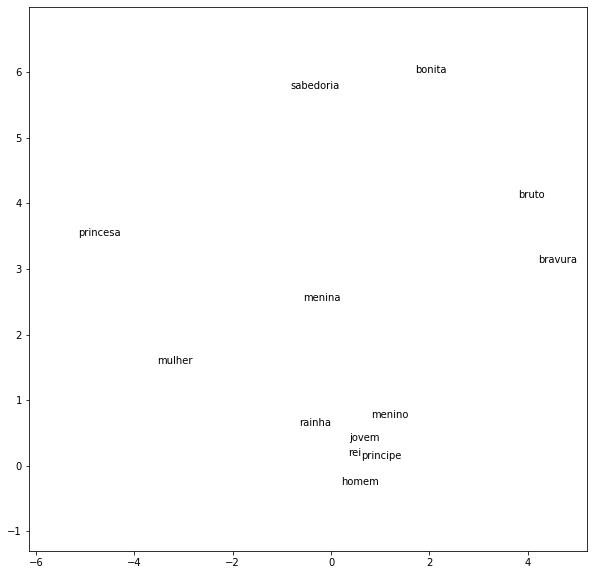

In [15]:
_, ax = plt.subplots(figsize = (10, 10))

for p, x, y in zip(w2v_df['palavra'], w2v_df['x'], w2v_df['y']):
    ax.annotate(p, (x, y))
    
_P = 1.0
ax_min = np.amin(vetores, axis = 0)[0] - _P
ax_max = np.amax(vetores, axis = 0)[0] + _P
ay_min = np.amin(vetores, axis = 0)[1] - _P
ay_max = np.amax(vetores, axis = 0)[1] + _P
 
plt.xlim(ax_min, ax_max)
plt.ylim(ay_min, ay_max)

## GenSim Word2Vec

A biblioteca [Gensim](https://radimrehurek.com/gensim/) traz a implementação de modelos conhecidos para o _embedding_ textual. Dentro dela há um modelo de Word2Vec pronto, vamos aprender como utilizar a biblioteca.

### Inputs

A classe `Word2Vec` espera recebem um array de _tokens_ resultante dos documentos do _corpus_, isso nada mais é que o conteudo de nossos documentos em formato de array onde cada posição guarda uma palavra (_token_) do documento.

Já fizemos esta operação e guardamos seu resultado na variável `ss`:

In [16]:
ss

[['rei', 'homem', 'bravura'],
 ['rainha', 'mulher', 'sabedoria'],
 ['menino', 'homem', 'jovem'],
 ['menina', 'mulher', 'jovem'],
 ['principe', 'jovem', 'rei'],
 ['princesa', 'jovem', 'rainha'],
 ['principe', 'menino', 'rei'],
 ['princesa', 'menina', 'rainha'],
 ['homem', 'bruto'],
 ['mulher', 'bonita']]

In [17]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import multiprocessing

A classe `Word2Vec` possui alguns parâmetros de configuração que podem ser fornecidos no momento de sua inicialização.

Sugiro verificar a [documentação](https://www.pydoc.io/pypi/gensim-3.2.0/autoapi/models/word2vec/index.html#models.word2vec.Word2Vec) para consulta de todas as possibilidades.

In [34]:
w2v = Word2Vec(min_count=1, size=5, iter=1, workers=1, batch_words=1, sg=1)

W0726 22:07:21.086062 140653923845760 base_any2vec.py:723] consider setting layer size to a multiple of 4 for greater performance


In [35]:
w2v.build_vocab(ss)

In [36]:
print("Word2Vec - tamanho do vocabulário:", len(w2v.wv.vocab))

Word2Vec - tamanho do vocabulário: 13


In [37]:
w2v.train(ss, total_examples=len(ss), epochs=5)

(13, 140)

Traz alguns métodos que facilitam certas operações, por exemplo o método `most_similar(string)` responde sempre com as 10 palavras mais similares na rede em relação a palavra fornecida como parâmetro.

In [38]:
w2v.most_similar("rei")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('menino', 0.8206554651260376),
 ('principe', 0.7086620330810547),
 ('menina', 0.5647340416908264),
 ('bravura', 0.4946507513523102),
 ('mulher', 0.4344739317893982),
 ('homem', 0.264234721660614),
 ('jovem', 0.1871151477098465),
 ('sabedoria', 0.10365021228790283),
 ('princesa', 0.04722865670919418),
 ('bonita', -0.17141196131706238)]

### t-SNE

Dessa vez temos mais do que duas dimensões em nossa camada escondida. Para plotar nossa representação em um plano cartesiano, precisamos reduzir a dimensionalidade de nossa informação.

O método t-Distributed Stochastic Neighbor Embedding (t-SNE) é muito conhecido na tarefa de redução de dimensionalidade. Você pode ler mais sobre este assunto neste [link](https://lvdmaaten.github.io/tsne/).

In [39]:
tsne = TSNE(n_components=2, random_state=0)

In [40]:
word_vectors_matriz = w2v.wv.vectors

In [41]:
word_vectors_matriz

array([[ 7.3382638e-02,  4.0420126e-02,  3.8707130e-02, -3.3096068e-02,
         3.4662131e-02],
       [ 5.6758523e-02, -4.8855938e-02,  4.1761491e-02, -7.0345886e-02,
        -9.5011055e-02],
       [-6.3799180e-02, -5.7852309e-02,  2.9231205e-03,  2.1539554e-02,
        -6.8613887e-02],
       [-8.9758500e-02,  1.5513301e-02, -3.1816125e-02,  9.1763005e-02,
        -4.2507369e-02],
       [ 7.6380186e-02,  4.6421632e-02,  7.7256702e-02, -8.1732142e-05,
        -2.4848707e-02],
       [ 2.5181128e-02,  2.2167565e-02,  2.9052800e-02, -8.3984725e-02,
        -7.0995666e-02],
       [ 7.8470469e-02, -7.0302390e-02, -9.5028415e-02, -6.2976666e-02,
        -5.5098247e-02],
       [ 1.1996258e-02, -9.2946306e-02,  2.2819608e-02, -6.5449685e-02,
        -1.4501191e-02],
       [ 5.4381382e-02,  6.4633250e-02, -9.7076753e-03, -3.9939541e-02,
         1.7617438e-02],
       [ 2.6216470e-02,  5.9235869e-03, -6.9219187e-02, -8.2643211e-02,
        -4.8920859e-02],
       [-9.0608150e-02,  6.907

In [42]:
word_vectors_matriz.shape

(13, 5)

In [43]:
x_y_vetores = tsne.fit_transform(word_vectors_matriz)

In [44]:
x_y_vetores

array([[ -94.37683  ,  186.34608  ],
       [  31.140198 ,   97.27929  ],
       [  63.008263 , -235.67665  ],
       [ 184.60393  ,  140.39923  ],
       [   9.133788 ,  -94.26909  ],
       [ 114.338104 ,   -8.695676 ],
       [-191.20082  ,  -81.765625 ],
       [ 186.20949  , -142.20813  ],
       [ -96.436646 , -201.58868  ],
       [  59.316532 ,  244.49103  ],
       [ -74.32064  ,   12.727472 ],
       [ 264.73828  ,    1.3405815],
       [-209.8782   ,   80.136246 ]], dtype=float32)

Agora que temos nosso dado em duas dimensões, podemos unificar nossa informação em um `DataFrame` para facilitar o processamento.

In [45]:
w2v_df = pd.DataFrame(x_y_vetores, columns = ['x', 'y'])
w2v_df['palavra'] = vocabulario
w2v_df = w2v_df[['palavra', 'x', 'y']]
w2v_df

,palavra,x,y
0,bravura,-94.376831,186.346085
1,jovem,31.140198,97.279289
2,principe,63.008263,-235.676651
3,bruto,184.603928,140.399231
4,menina,9.133788,-94.269089
5,mulher,114.338104,-8.695676
6,sabedoria,-191.200821,-81.765625
7,rainha,186.209488,-142.208130
8,princesa,-96.436646,-201.588684
9,homem,59.316532,244.491028


Para facilitar a visualização, padronizamos os dados das colunas `x` e `y`.

In [46]:
w2v_df['x'] = (w2v_df['x'] - w2v_df['x'].mean())/w2v_df['x'].std()
w2v_df['y'] = (w2v_df['y'] - w2v_df['y'].mean())/w2v_df['y'].std()

In [47]:
w2v_df

,palavra,x,y
0,bravura,-0.769680,1.261148
1,jovem,0.082835,0.658733
2,principe,0.299284,-1.593258
3,bruto,1.125164,0.950381
4,menina,-0.066633,-0.636829
5,mulher,0.647917,-0.058042
6,sabedoria,-1.427310,-0.552261
7,rainha,1.136069,-0.961071
8,princesa,-0.783670,-1.362700
9,homem,0.274209,1.654420


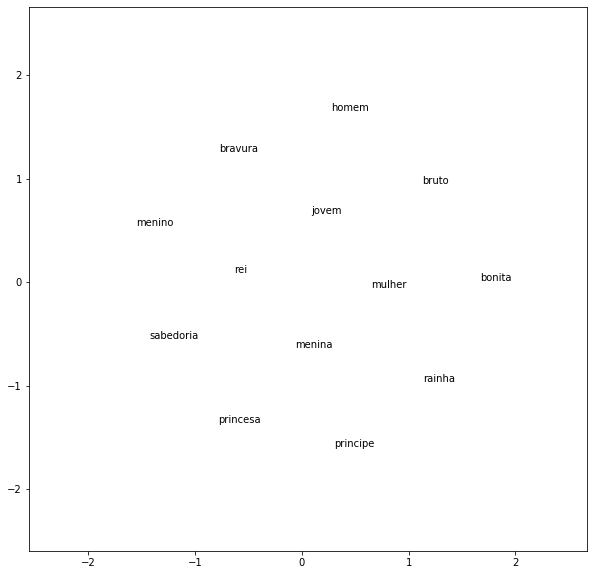

In [48]:
_, ax = plt.subplots(figsize = (10, 10))

for p, x, y in zip(w2v_df['palavra'], w2v_df['x'], w2v_df['y']):
    ax.annotate(p, (x, y))
    
_P = 1.0
ax_min = w2v_df['x'].min() - _P
ax_max = w2v_df['x'].max() + _P
ay_min = w2v_df['y'].min() - _P
ay_max = w2v_df['y'].max() + _P
 
plt.xlim(ax_min, ax_max)
plt.ylim(ay_min, ay_max)

plt.show()

## Desafio

### Word2Vec nos laudos de coronária

O DataFrame abaixo contém 500 laudos radiológicos de angiotomografia de coronária. O desafio é realizar o mesmo processamento que fizemos nos exemplos acima para preparar o dado e utilizar a classe `Word2Vec` para gerar uma representação vetorial de similaridade deste corpus.

In [22]:
import pandas as pd
import nltk
import numpy as np

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fernando/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [7]:
lista = ['banana', 'abacate', 'e', 'de']

In [10]:
lista_tmp = list()

for palavra in lista:
    if palavra not in stopwords:
        lista_tmp.append(palavra)

In [11]:
lista_tmp

['banana', 'abacate']

In [12]:
df_coronaria = pd.read_excel('https://raw.githubusercontent.com/pgiaeinstein/nlp/master/data_coronaria.xlsx')

In [13]:
df_coronaria.head()

,texto
0,paciente com escore de calcio de zero fase com...
1,paciente com escore de calcio de zero fase com...
2,paciente com escore de calcio de zero fase com...
3,paciente com escore de calcio zero fase com co...
4,paciente com escore de calcio de zero fase com...


In [33]:
lista_textos_raw = df_coronaria.iloc[:, 0]

In [44]:
import multiprocessing

In [46]:
multiprocessing.cpu_count()

4

In [39]:
def texto_para_tokens(lista_textos, lista_stopwords):
    
    # iniciar uma lista de retorno
    lista_retorno = list()
    # iterar na minha lista de textos e processar a informacao
    for texto in lista_textos:
        # criar lista temporario
        lista_tmp = list()
        # criar uma lista de tokens (metodo split)
        lista_tokens = texto.split(' ')
        
        # iterar em cada token
        for token in lista_tokens:
            # se o token nao estiver na minha lista de stopwords
            if token not in lista_stopwords:
                # add lista temporaria
                lista_tmp.append(token)
                
        # add lista retorno
        lista_retorno.append(lista_tmp)
        
    # retorno lista de retorno
    return lista_retorno

In [40]:
lista_textos = texto_para_tokens(lista_textos_raw, stopwords)

In [70]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import multiprocessing

In [49]:
w2v = Word2Vec(iter=15, workers=multiprocessing.cpu_count())

In [50]:
w2v.build_vocab(lista_textos)

In [51]:
print("Word2Vec - tamanho do vocabulário:", len(w2v.wv.vocab))

Word2Vec - tamanho do vocabulário: 214


In [52]:
w2v.train(lista_textos, total_examples=len(w2v.wv.vocab), epochs=15)

(198702, 534810)

In [75]:
w2v.most_similar("coronaria")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('contraste', 0.9492517113685608),
 ('dominante', 0.9410584568977356),
 ('fase', 0.9389059543609619),
 ('tronco', 0.9215652942657471),
 ('direita', 0.9149439930915833),
 ('esquerda', 0.9018687009811401),
 ('zero', 0.8871407508850098),
 ('trifurcando', 0.8365598320960999),
 ('calcio', 0.7868314385414124),
 ('bifurcando', 0.7854268550872803)]

In [55]:
tsne = TSNE(n_components=2, random_state=0)

In [56]:
word_vectors_matriz = w2v.wv.vectors

In [57]:
word_vectors_matriz

array([[ 0.11434989, -0.6797671 , -0.00781147, ..., -0.19672337,
         0.19076031,  0.4516992 ],
       [ 0.17795481, -0.6787414 , -0.1583932 , ..., -0.29272634,
        -0.14738351,  0.42663997],
       [-0.197796  , -0.76252776, -0.38916388, ..., -0.35567588,
         0.07306638,  0.6217383 ],
       ...,
       [ 0.15433715, -0.06852514,  0.01843551, ...,  0.21041341,
        -0.03256441, -0.05336257],
       [ 0.23079506, -0.06300228,  0.06714953, ...,  0.23747241,
        -0.02938794, -0.11008641],
       [ 0.07331496, -0.09592201, -0.10903522, ...,  0.16310301,
         0.02786694, -0.11693872]], dtype=float32)

In [58]:
word_vectors_matriz.shape

(214, 100)

In [59]:
x_y_vetores = tsne.fit_transform(word_vectors_matriz)

In [62]:
x_y_vetores[:5]

array([[  4.246806 ,  -7.6150236],
       [  5.025515 ,  -6.142928 ],
       [  5.064742 ,  -6.1391892],
       [  2.8294494, -12.1377125],
       [  3.001758 , -12.184744 ]], dtype=float32)

Agora que temos nosso dado em duas dimensões, podemos unificar nossa informação em um `DataFrame` para facilitar o processamento.

In [65]:
w2v_df = pd.DataFrame(x_y_vetores, columns = ['x', 'y'])
w2v_df['palavra'] = w2v.wv.vocab
w2v_df = w2v_df[['palavra', 'x', 'y']]
w2v_df.head()

,palavra,x,y
0,paciente,4.246806,-7.615024
1,escore,5.025515,-6.142928
2,calcio,5.064742,-6.139189
3,zero,2.829449,-12.137712
4,fase,3.001758,-12.184744


Para facilitar a visualização, padronizamos os dados das colunas `x` e `y`.

In [66]:
w2v_df['x'] = (w2v_df['x'] - w2v_df['x'].mean())/w2v_df['x'].std()
w2v_df['y'] = (w2v_df['y'] - w2v_df['y'].mean())/w2v_df['y'].std()

In [68]:
w2v_df.head()

,palavra,x,y
0,paciente,0.889317,-0.965759
1,escore,1.032641,-0.763015
2,calcio,1.039861,-0.762500
3,zero,0.628447,-1.588646
4,fase,0.660161,-1.595123


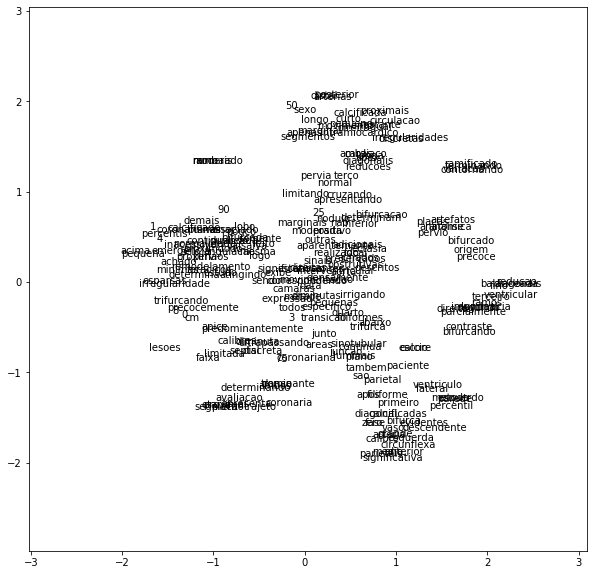

In [71]:
_, ax = plt.subplots(figsize = (10, 10))

for p, x, y in zip(w2v_df['palavra'], w2v_df['x'], w2v_df['y']):
    ax.annotate(p, (x, y))
    
_P = 1.0
ax_min = w2v_df['x'].min() - _P
ax_max = w2v_df['x'].max() + _P
ay_min = w2v_df['y'].min() - _P
ay_max = w2v_df['y'].max() + _P
 
plt.xlim(ax_min, ax_max)
plt.ylim(ay_min, ay_max)

plt.show()

In [72]:
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [73]:
# dvc
source = ColumnDataSource(data=dict(x=w2v_df['x'], y=w2v_df['y'], desc=w2v_df['palavra']))
hover = HoverTool(tooltips=[("DESC", "@desc"), ("(x,y)", "($x, $y)"),])

p = figure(plot_width=900, plot_height=800, tools=[hover], 
           title="Word2Vec nos laudos de coronária")

p.circle('x', 'y', size=5, source=source)
show(p)